# Exploring Health Spending and Life Expectancy Data

### By Melody Niere

In [86]:
#import libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
#Import and look at life expectancy data
health_exp_df = sns.load_dataset('healthexp')
health_exp_df.head(5)

,Year,Country,Spending_USD,Life_Expectancy
0,1970,Germany,252.311,70.6
1,1970,France,192.143,72.2
2,1970,Great Britain,123.993,71.9
3,1970,Japan,150.437,72.0
4,1970,USA,326.961,70.9


In [88]:
health_exp_df.tail(5)

,Year,Country,Spending_USD,Life_Expectancy
269,2020,Germany,6938.983,81.1
270,2020,France,5468.418,82.3
271,2020,Great Britain,5018.700,80.4
272,2020,Japan,4665.641,84.7
273,2020,USA,11859.179,77.0


In [89]:
#check if there are nulls
health_exp_df.isnull().sum()

Year               0
Country            0
Spending_USD       0
Life_Expectancy    0
dtype: int64

In [90]:
#check if there are duplicates
df.duplicated().sum()

0

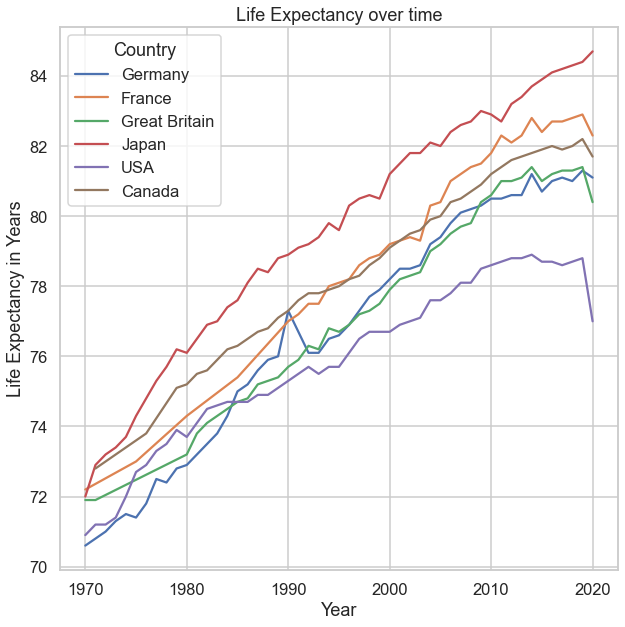

In [91]:
#How has life expectancy change over time?
#Create lineplot of life expectancy over time
sns.lineplot(x = 'Year', y = 'Life_Expectancy', data = df, hue = 'Country', ci = False, markers = True)
sns.set(rc={'figure.figsize': (15,10)}) #set length of x and y axis
sns.set_style("whitegrid") #white background
sns.set_context("talk") #increase font size
plt.title("Life Expectancy over time")
plt.xlabel('Year')
plt.ylabel('Life Expectancy in Years') 
plt.show()

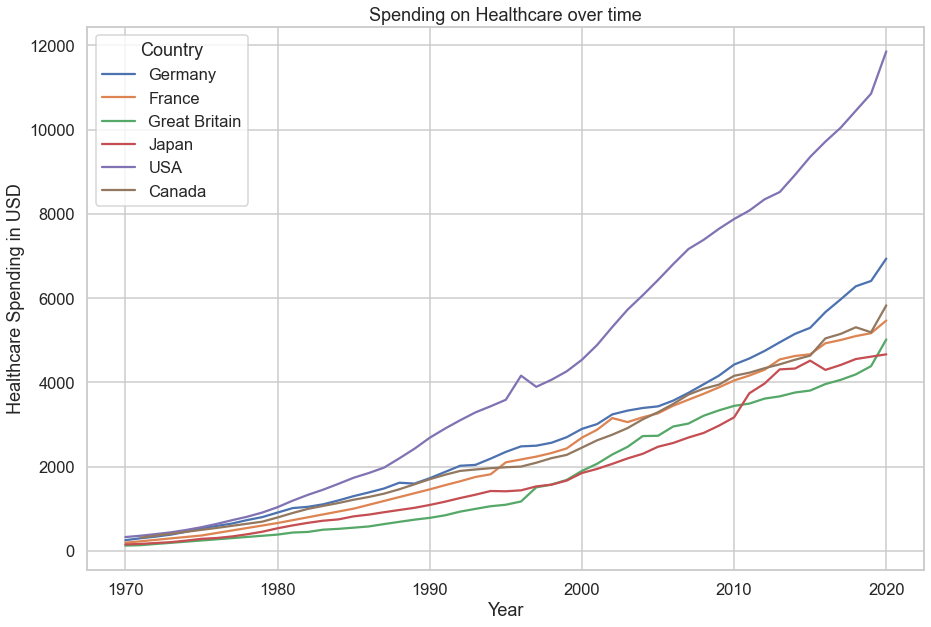

In [92]:
#How has spending on healthcare changed over time?
#Create lineplot of spending over over time
sns.lineplot(x = 'Year', y = 'Spending_USD', data = df, hue = 'Country', ci = False, markers = True)
sns.set(rc={'figure.figsize': (15,10)}) #set length of x and y axis
sns.set_style("whitegrid") #white background
sns.set_context("talk") #increase font size
plt.title("Spending on Healthcare over time")
plt.xlabel('Year')
plt.ylabel('Healthcare Spending in USD') 
plt.show()

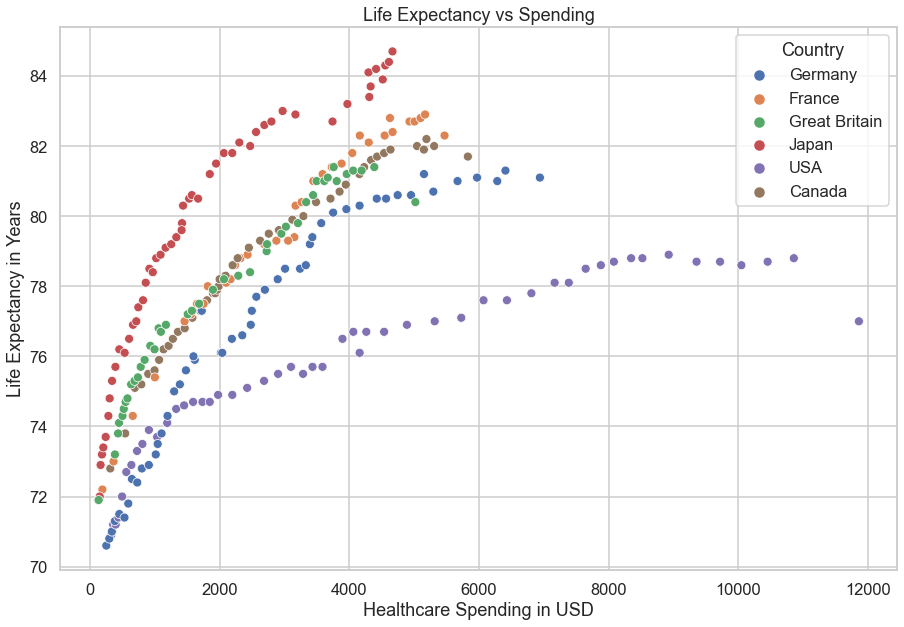

In [93]:
#Is there a relationship between spending and life expectancy?
#Create scatterplot of spending and life expectancy
sns.scatterplot(x = 'Spending_USD' , y = 'Life_Expectancy', data = df, hue = 'Country')
sns.set(rc={'figure.figsize': (10,10)}) #set length of x and y axis
sns.set_style("whitegrid") #white background
sns.set_context("talk") #increase font size
plt.title("Life Expectancy vs Spending")
plt.xlabel('Healthcare Spending in USD')
plt.ylabel('Life Expectancy in Years') 
plt.show()

In [94]:
#Is there a relationship between spending and life expectancy?
health_exp_df[['Spending_USD', 'Life_Expectancy']].corr()\

#overall correlation of .58 is a moderate correlation

,Spending_USD,Life_Expectancy
Spending_USD,1.00000,0.57943
Life_Expectancy,0.57943,1.00000


In [95]:
#What is the correlation between spending and life expectancy by country?
#create a function to determine correlation by country
def correlation (country):
    temp_df = health_exp_df[health_exp_df["Country"]== country] #create a dataframe subset of country
    country_correlation = temp_df[['Spending_USD', 'Life_Expectancy']].corr() #calculates correlation
    return country_correlation #prints correlation

In [96]:
correlation('Germany')

,Spending_USD,Life_Expectancy
Spending_USD,1.000000,0.939061
Life_Expectancy,0.939061,1.000000


In [97]:
correlation('France')

,Spending_USD,Life_Expectancy
Spending_USD,1.000000,0.969428
Life_Expectancy,0.969428,1.000000


In [98]:
correlation('Great Britain')

,Spending_USD,Life_Expectancy
Spending_USD,1.00000,0.95798
Life_Expectancy,0.95798,1.00000


In [99]:
correlation('Japan')

,Spending_USD,Life_Expectancy
Spending_USD,1.000000,0.914187
Life_Expectancy,0.914187,1.000000


In [100]:
correlation('USA')

,Spending_USD,Life_Expectancy
Spending_USD,1.000000,0.906852
Life_Expectancy,0.906852,1.000000


In [101]:
correlation('Canada')

,Spending_USD,Life_Expectancy
Spending_USD,1.000000,0.965446
Life_Expectancy,0.965446,1.000000


In [102]:
#What is the min, median, and max life expectancy by country?
#create a pivot table
health_exp_df.pivot_table(['Life_Expectancy'], ['Country'], aggfunc = ['min','median','max'])

,min,median,max
,Life_Expectancy,Life_Expectancy,Life_Expectancy
Country,,,
Canada,72.8,78.7,82.2
France,72.2,79.4,82.9
Germany,70.6,77.1,81.3
Great Britain,71.9,77.5,81.4
Japan,72.0,79.8,84.7
USA,70.9,75.7,78.9


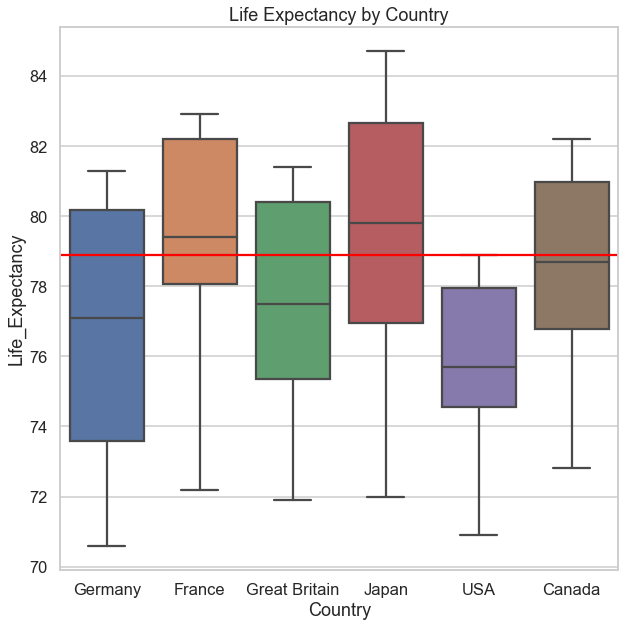

In [103]:
#How can I show that the USA has a low life expectancy?
#create a boxplot by country showing life expectancy

sns.boxplot(x = 'Country', y = 'Life_Expectancy', data = df, hue = 'Country', dodge = False)
sns.set(rc={'figure.figsize': (10,10)}) #set length of x and y axis
sns.set_style("whitegrid") #white background
sns.set_context("talk") #increase font size
plt.legend([],[], frameon=False) #remove legend
plt.axhline(y=78.9, color = 'red') #draw a line at USA max life expectancy
plt.title("Life Expectancy by Country")
plt.show()